In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
df= pd.read_csv('df-filteredfinalN.csv')
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense
from keras.layers.core import Dropout, Activation, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
import timeit


In this part of the solution, different Convolutional Neural Network(CNN) models are created for the training data from the Fashion MNIST dataset[1]. The model is then tested on the test set and the accuracy is then measured. All the important block codes for creating the models are titled and explained below.

# Forming the Dataframe 'df'

The block below was used to load the training x(features) dataset and training y(label) dataset named 'trainX.csv' and 'trainy.csv' respectively. Then, the 'Id' column present in the training x dataset is removed. Both datasets are concateneted to form the 'df' dataframe. 

In [2]:


cols = list(pd.read_csv("trainX.csv", nrows =1))

xt=pd.read_csv('trainX.csv', usecols = [i for i in cols if i != 'Id'])

yt=pd.read_csv('trainy.csv')

df=pd.concat([xt,yt], axis=1)

del df['Id']

xtest=pd.read_csv('testX.csv')

ytest=pd.read_csv('testy.csv')

del xtest['Id']
del ytest['Id']


df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,...,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850,2.002933
std,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,...,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444,1.415000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,14.000000,45.000000,218.000000,185.000000,227.000000,229.000000,224.000000,225.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,4.000000


# Dividing Features and Encoding Labels

The block below is used to separate the dependent and independent features. The labels are also encoded using one hot coding. 

In [3]:

#Separating dependent and independent features

x =df.loc[:,'0':'783'].values.reshape(len(df),28,28,1)

y1 = df[' Label'].values


#One hot ecoding for label

y = keras.utils.to_categorical(y1, num_classes=5)



# Splitting Train and Test Sets

The Train and Test sets are separarted with the test size being 0.2.

In [4]:
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=275)
  x_train=x_train.astype('float32')
  xtest=xtest.astype('float32')


# Model 1: 2 Convolutionational Layers with 32 Filters(ReLU Activation)

The model created in the block below contains 2 convolutional layers with 32 filter, ReLU activation and 'Same' padding.

In [44]:
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))


model1.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(150, activation = "relu"))
model1.add(Dense(5, activation = "softmax"))


model1.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

start=timeit.default_timer()
classifier1=model1.fit(x_train,y_train,batch_size = 32,epochs = 15,verbose=1,validation_split= 0.33)
stop=timeit.default_timer()




Epoch 1/15
1005/1005 [==============================] - 67s 64ms/step - loss: 0.9458 - accuracy: 0.6745 - val_loss: 0.6141 - val_accuracy: 0.7429
Epoch 2/15
1005/1005 [==============================] - 64s 64ms/step - loss: 0.5618 - accuracy: 0.7579 - val_loss: 0.5494 - val_accuracy: 0.7658
Epoch 3/15
1005/1005 [==============================] - 69s 68ms/step - loss: 0.5015 - accuracy: 0.7865 - val_loss: 0.5002 - val_accuracy: 0.7896
Epoch 4/15
1005/1005 [==============================] - 64s 63ms/step - loss: 0.4502 - accuracy: 0.8078 - val_loss: 0.5001 - val_accuracy: 0.7902
Epoch 5/15
1005/1005 [==============================] - 68s 68ms/step - loss: 0.4129 - accuracy: 0.8230 - val_loss: 0.4725 - val_accuracy: 0.8032
Epoch 6/15
1005/1005 [==============================] - 70s 69ms/step - loss: 0.3861 - accuracy: 0.8363 - val_loss: 0.5028 - val_accuracy: 0.8093
Epoch 7/15
1005/1005 [==============================] - 72s 72ms/step - loss: 0.3611 - accuracy: 0.8462 - val_loss: 0.4950 -

# Model 1 Training Accuracy:

The block below trains Model 1 and prints the total training time, the training accuracy and the validation accuracy.

In [55]:
print('Max. Accuracy for the Training Set:')
print(max(classifier1.history['accuracy']))

print('Max. Accuracy for the Validation Set:')
print(max(classifier1.history['val_accuracy']))


Max. Accuracy for the Training Set:
0.9146117568016052
Max. Accuracy for the Validation Set:
0.8152894377708435


A 91.46 percent of accuracy was achieved in the training set and a 81.53 percent of accuracy was achieved in the validation set.

# Training Loss vs. Training Epoch Plot

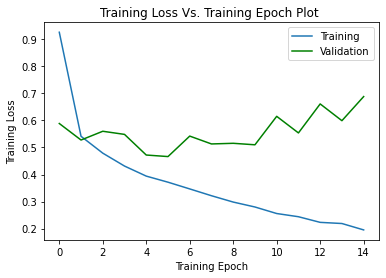

In [19]:
y= classifier1.history['loss']
x= range(0,15)
y1=classifier1.history['val_loss']

plt.plot(x,y,label='Training Loss')
plt.plot(x,y1,'g',label='Validation Loss')

plt.ylabel('Training Loss')
plt.xlabel('Training Epoch')
plt.title('Training Loss Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

      Figure 1. Training Loss Vs. Training Epoch Plot

# Classification Accuracy Vs. Training Epoch Plot

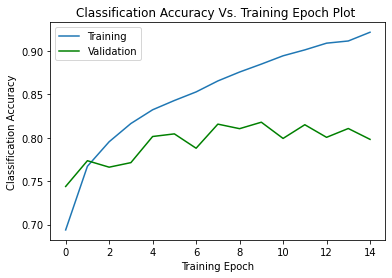

In [20]:
y= classifier1.history['accuracy']
y1= classifier1.history['val_accuracy']
x= range(0,15)

plt.plot(x,y, label='Training Accuracy')
plt.plot(x,y1,'g', label='Validation Accuracy')

plt.ylabel('Classification Accuracy')
plt.xlabel('Training Epoch')
plt.title('Classification Accuracy Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

    Figure 2. Classification Accuracy Vs. Training Epoch Plot

# Model 2: 2 Convolutionational Layers with 16 Filters(ReLU Activation), Valid Padding, and Dropout(0.5)

The model created in the block below contains 2 convolutional layers with 16 filter, ReLU activation and 'Valid' padding[2] with a dropout of 0.5.

# Model 2 Training Accuracy:

In [48]:
model2 = Sequential()

model2.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Valid', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Valid', 
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(150, activation = "relu"))
model2.add(Dense(5, activation = "softmax"))


model2.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

classifier2=model2.fit(x_train,y_train,batch_size = 32,epochs = 20,verbose=1,validation_split= 0.33)




Epoch 1/20
1005/1005 [==============================] - 29s 26ms/step - loss: 1.2856 - accuracy: 0.6179 - val_loss: 0.7287 - val_accuracy: 0.6839
Epoch 2/20
1005/1005 [==============================] - 33s 32ms/step - loss: 0.6838 - accuracy: 0.7057 - val_loss: 0.6547 - val_accuracy: 0.7213
Epoch 3/20
1005/1005 [==============================] - 38s 38ms/step - loss: 0.5973 - accuracy: 0.7450 - val_loss: 0.5962 - val_accuracy: 0.7493
Epoch 4/20
1005/1005 [==============================] - 36s 36ms/step - loss: 0.5474 - accuracy: 0.7670 - val_loss: 0.5743 - val_accuracy: 0.7569
Epoch 5/20
1005/1005 [==============================] - 33s 33ms/step - loss: 0.5120 - accuracy: 0.7815 - val_loss: 0.6163 - val_accuracy: 0.7366
Epoch 6/20
1005/1005 [==============================] - 36s 35ms/step - loss: 0.4799 - accuracy: 0.7978 - val_loss: 0.5422 - val_accuracy: 0.7763
Epoch 7/20
1005/1005 [==============================] - 36s 36ms/step - loss: 0.4578 - accuracy: 0.8061 - val_loss: 0.5591 -

The block below prints the total training time, the training accuracy and the validation accuracy.

In [8]:

print('Max. Accuracy for the Training Set:')
print(max(classifier2.history['accuracy']))

print('Max. Accuracy for the Validation Set:')
print(max(classifier2.history['val_accuracy']))


Max. Accuracy for the Training Set:
0.8856307864189148
Max. Accuracy for the Validation Set:
0.7944574356079102


# Training Loss vs. Training Epoch Plot

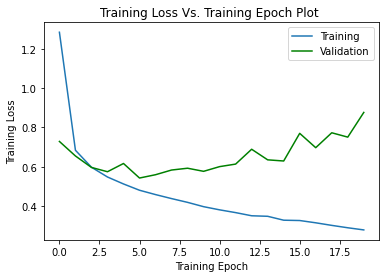

In [51]:
y= classifier2.history['loss']
x= range(0,20)
y1=classifier2.history['val_loss']

plt.plot(x,y,label='Training Loss')
plt.plot(x,y1,'g',label='Validation Loss')

plt.ylabel('Training Loss')
plt.xlabel('Training Epoch')
plt.title('Training Loss Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

        Figure 3. Training Loss Vs. Training Epoch Plot

# Classification Accuracy Vs. Training Epoch Plot

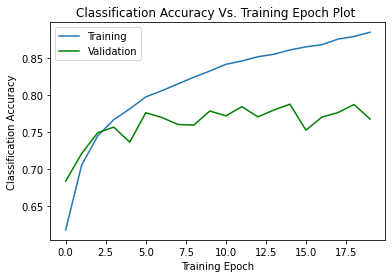

In [52]:
y= classifier2.history['accuracy']
y1= classifier2.history['val_accuracy']
x= range(0,20)

plt.plot(x,y, label='Training Accuracy')
plt.plot(x,y1,'g', label='Validation Accuracy')

plt.ylabel('Classification Accuracy')
plt.xlabel('Training Epoch')
plt.title('Classification Accuracy Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

      Figure 4. Classification Accuracy Vs. Training Epoch Plot

# Model 3: 4 Convolutionational Layers with 16 filters(layer 1,2), 32 Filters(Layer 3,4) with (ReLU Activation), and Valid Padding

In [29]:
model3 = Sequential()

model3.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model3.add(Flatten())
model3.add(Dense(150, activation = "relu"))
model3.add(Dense(5, activation = "softmax"))


model3.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

start=timeit.default_timer()
classifier3=model3.fit(x_train,y_train,batch_size = 32,epochs = 20,verbose=1,validation_split= 0.33)
stop=timeit.default_timer()

Epoch 1/20
1005/1005 [==============================] - 23s 23ms/step - loss: 0.8036 - accuracy: 0.6566 - val_loss: 0.6461 - val_accuracy: 0.7227
Epoch 2/20
1005/1005 [==============================] - 30s 30ms/step - loss: 0.6136 - accuracy: 0.7373 - val_loss: 0.6182 - val_accuracy: 0.7426
Epoch 3/20
1005/1005 [==============================] - 43s 42ms/step - loss: 0.5409 - accuracy: 0.7681 - val_loss: 0.5585 - val_accuracy: 0.7653
Epoch 4/20
1005/1005 [==============================] - 57s 56ms/step - loss: 0.5012 - accuracy: 0.7883 - val_loss: 0.5005 - val_accuracy: 0.7864
Epoch 5/20
1005/1005 [==============================] - 51s 50ms/step - loss: 0.4673 - accuracy: 0.8015 - val_loss: 0.5767 - val_accuracy: 0.7482
Epoch 6/20
1005/1005 [==============================] - 50s 50ms/step - loss: 0.4504 - accuracy: 0.8099 - val_loss: 0.4658 - val_accuracy: 0.8043
Epoch 7/20
1005/1005 [==============================] - 62s 62ms/step - loss: 0.4256 - accuracy: 0.8195 - val_loss: 0.4749 -

# Model 3 Training Accuracy:

The block below prints the total training time, the training accuracy and the validation accuracy.

In [32]:

print('Max. Accuracy for the Training Set:')
print(max(classifier3.history['accuracy']))

print('Max. Accuracy for the Validation Set:')
print(max(classifier3.history['val_accuracy']))


Max. Accuracy for the Training Set:
0.8741876482963562
Max. Accuracy for the Validation Set:
0.8207815289497375


# Training Loss vs. Training Epoch Plot

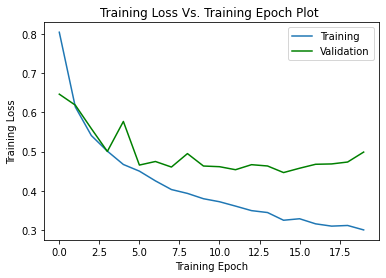

In [33]:
y= classifier3.history['loss']
x= range(0,20)
y1=classifier3.history['val_loss']

plt.plot(x,y,label='Training Loss')
plt.plot(x,y1,'g',label='Validation Loss')

plt.ylabel('Training Loss')
plt.xlabel('Training Epoch')
plt.title('Training Loss Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

        Figure 5. Training Loss Vs. Training Epoch Plot

# Classification Accuracy Vs. Training Epoch Plot

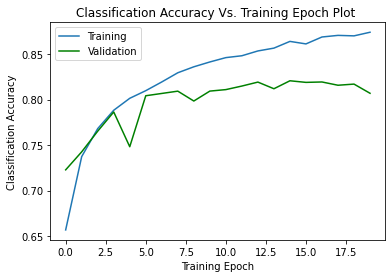

In [34]:
y= classifier3.history['accuracy']
y1= classifier3.history['val_accuracy']
x= range(0,20)

plt.plot(x,y, label='Training Accuracy')
plt.plot(x,y1,'g', label='Validation Accuracy')

plt.ylabel('Classification Accuracy')
plt.xlabel('Training Epoch')
plt.title('Classification Accuracy Vs. Training Epoch Plot ')
plt.legend(['Training','Validation'])

      Figure 6. Classification Accuracy Vs. Training Epoch Plot

# Review

1. Runtime Performance:

    A. Model 1: The maximum accuracy for the training set was 91.46% and the maximum accuracy for the validation set was 81.53%. On the 'Training loss Vs. Training Epoch' plot, the training loss error reached 0.2(20%) after 12 epochs. For the validation,  the training loss error reached 0.65(65%) after 14 epochs as shown in figure 1. On the 'Classification Accuracy Vs. Training Epoch Plot', the validation set curve settled at 0.78 epoach(78%) and the training curve reached almost 0.94(94%) in classification accuracy after about 17 epochs as shown in the figure 2.
    
    
    B. Model 2: The maximum accuracy for the training set was 88.52% and the maximum accuracy for the validation set was 78.8%. On the 'Training loss Vs. Training Epoch' plot, the training loss error settled and remained below 0.4(40%) after 17 epochs. For the validation set, the training loss error went below 0.8 after 1 epoch but then came back up after 17 epochs as shown in figure 3. On the 'Classification Accuracy Vs. Training Epoch Plot', the validation set curve settled at 0.75 epoach(75%) and the training curve reached almost 0.9(90%) in classification accuracy after about 17 epochs as shown in the figure 4.
    
    C. Model 3: The maximum accuracy for the training set was 87.42% and the maximum accuracy for the validation set was 82.08%. On the 'Training loss Vs. Training Epoch' plot, the training loss error reached 0.3(30%) after 17 epochs. For the validation set, the training loss error reached and remained 0.47(47%)   shown in figure 5. On the 'Classification Accuracy Vs. Training Epoch Plot', the validation set curve remained at 0.8(80%) and the training curve reached 0.9(90%) in classification accuracy after about 2 epochs as shown in the figure 6.
    
    

2. Comparison: Model 1 had the best performance, followed by Model 3. Model 2 had the worst performace as it only had 78.8% maximum accuracy in the validation dataset. 

# References

[1]https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python#predictions

[2]https://www.geeksforgeeks.org/types-of-padding-in-convolution-layer/